# Broadcasting

In [1]:
import torch
import numpy as np

In [2]:
t1 = torch.tensor([[1, 2, 3],])

In [3]:
t1

tensor([[1, 2, 3]])

In [4]:
t1.shape

torch.Size([1, 3])

In [5]:
t2 = torch.tensor([
 [4],
 [5],
 [6]
])

In [6]:
t2.shape

torch.Size([3, 1])

In [7]:
t1 + t2

tensor([[5, 6, 7],
        [6, 7, 8],
        [7, 8, 9]])

## Step 1: Determine If Tensors Are Compatible

In [ ]:
We compare the shapes of the two tensors, starting at their last dimensions and working backwards. 
Our goal is to determine whether each dimension between the two tensors’ shapes is compatible.

The dimensions are compatible when either:

-They’re equal to each other.
-One of them is 1.

# 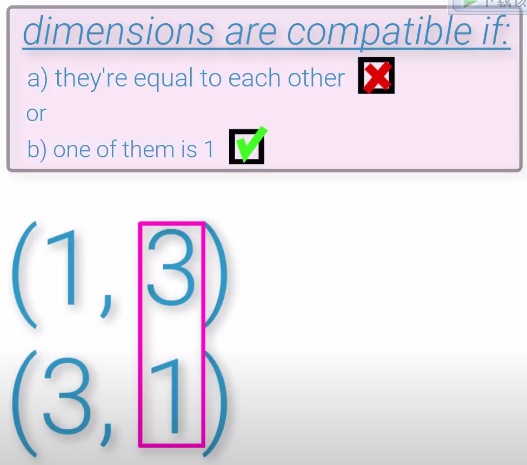

In [ ]:
Are they equal to each other? No, 1 doesn’t equal 3.

Is one of them 1? Yes.

Great, the last dimensions are compatible. Working our way to the front, for the next dimension, we have a 3 and a 1. 
Similar story, just switched order, right? So, are these compatible? Yes, again, because one of them is 1.

Ok, that’s the first step. We’ve confirmed each dimension between the two shapes is compatible.

## Step 2: Determine The Shape Of The Resulting Tensor

In [ ]:
Comparing the shape of (1, 3) to (3, 1), we first calculate the max of the last dimension.

The max of 3 and 1 is 3. 3 will be the last dimension of the shape of the resulting tensor.

Moving on to the next dimension, again, the max of 1 and 3 is 3. 
So, 3 will be the next dimension of the shape of the resulting tensor.

We’ve now stepped through each dimension of the shapes of the original tensors. 
We can conclude that the resulting tensor will have shape (3, 3).

In [ ]:
The original tensors of shape (1, 3) and (3, 1) will now be expanded to shape (3, 3) in order to do the element-wise operation.

The values in our (1, 3) tensor will now be broadcast to this (3, 3) tensor.

Tensor 1 Broadcast To Shape (3,3):
    Before:
        [[1, 2, 3],]

    After:
        [[1, 2, 3],
         [1, 2, 3],
         [1, 2, 3]]
    
Tensor 2 Broadcast To Shape (3,3):
    Before:
        [[4],
         [5],
         [6]]

    After:
        [[4, 4, 4],
         [5, 5, 5],
         [6, 6, 6]]   
        
We can now easily take the element-wise sum of these two to get this resulting (3, 3) tensor.

    [[1, 2, 3],
     [1, 2, 3],
     [1, 2, 3]]
+
    [[4, 4, 4],
     [5, 5, 5],
     [6, 6, 6]]
-------------------- 
    [[5, 6, 7],
     [6, 7, 8],
     [7, 8, 9]] 

## Broadcasting Example 3: Different Ranks

In [ ]:
What if we wanted to multiply this rank-2 tensor of shape (1, 3) with this rank-0 tensor, better known as a scalar?

Tensor 1:
[[1, 2, 3],]

rank: 2
shape: (1,3)
    
Tensor 2:
5

rank: 0
shape: ()

### Step 1: Determine If Tensors Are Compatible

# 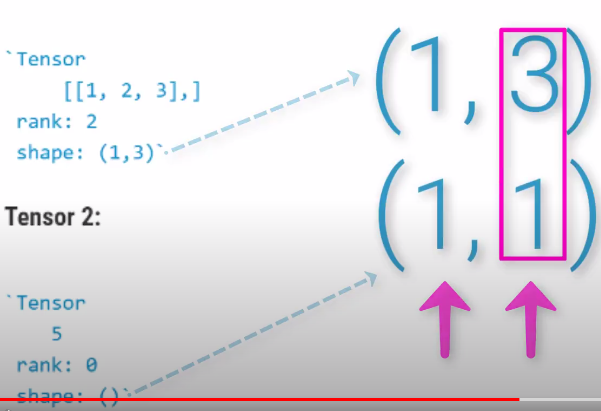

In [ ]:
When we’re in a situation where the ranks of the two tensors aren’t the same, like what we have here, 
then we simply substitute a one in for the missing dimensions of the lower-ranked tensor.

In our example, we substitute a one for both missing dimensions in the scalar's shape, making it now have shape (1,1)

Then, we ask, are the dimensions compatible? 
And the answer will always be yes in this type of scenario since one of them will always be a one.

### Step 2: Determine The Shape Of The Resulting Tensor

In [ ]:
Alright, all the dimensions are compatible, so what will the resulting tensor look like from multiplying these two together? 
Again, go ahead and pause here and try yourself before getting the answer.

Well, the max of 3 and 1 is 3, and the max of 1 and 1 is 1. So our resulting tensor will be of shape (1, 3).

Our first tensor is already this shape, so it gets left alone.
Our second tensor is now expanded to this shape by broadcasting it’s value like this.

Before:
    5

After:
    [[5, 5, 5],]
    
    
Tensor 1 X Tensor 2:    
    [[1, 2, 3],]
x 
    5
-------------------- 
    [[5, 10, 15],]
    rank: 2
    shape: (1,3)

## Broadcasting Example 4: Different Ranks… Again

In [ ]:
What if we wanted to sum this rank-3 tensor of shape (1, 2, 3) and this rank-2 tensor of shape (3, 3)?

Tensor 1:
[[[1, 2, 3],
  [4, 5, 6]]]

rank: 3
shape: (1,2,3)
    
Tensor 2:
[[1, 1, 1],
 [2, 2, 2],
 [3, 3, 3]]

rank: 2
shape: (3,3)

#### 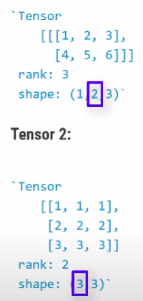

In [ ]:
Comparing the second-to-last dimensions of the shapes, 
they’re not equal to each other, and neither one of them is one, so we stop there.